In [5]:
import math
import numpy as np
from scipy.stats import skew
import statistics
import random
import skimage.io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
warnings.filterwarnings("ignore")

In [30]:
n = 25

sample = np.array([np.random.exponential(1) for i in range(n)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


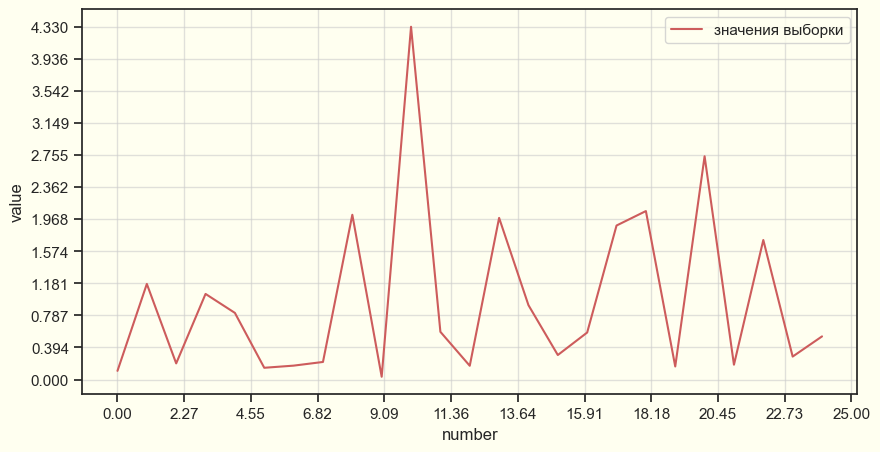

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid()

ax.set_xticks(np.linspace(0, len(sample), 12))
ax.set_yticks(np.linspace(0, np.max(sample), 12))

ax.set_xlabel('number')
ax.set_ylabel('value')

ax.grid(which="major", alpha=0.6)
ax.legend(loc='best', prop={'size': 15})

ax.plot(sample, color = 'indianred', label ='значения выборки')
ax.legend()

# мода, медиана, размах, коэфф ассиметрии

In [32]:
print(f' mode is {statistics.mode(sample)} \n median is {statistics.median(sample)} \n scope is {np.max(sample)-np.min(sample)} \n gamma is {skew(sample)}')

 mode is 0.10690471970519728 
 median is 0.5773650773498672 
 scope is 4.295043684628204 
 gamma is 1.5265386354270767


# эмпирическая функция распределения

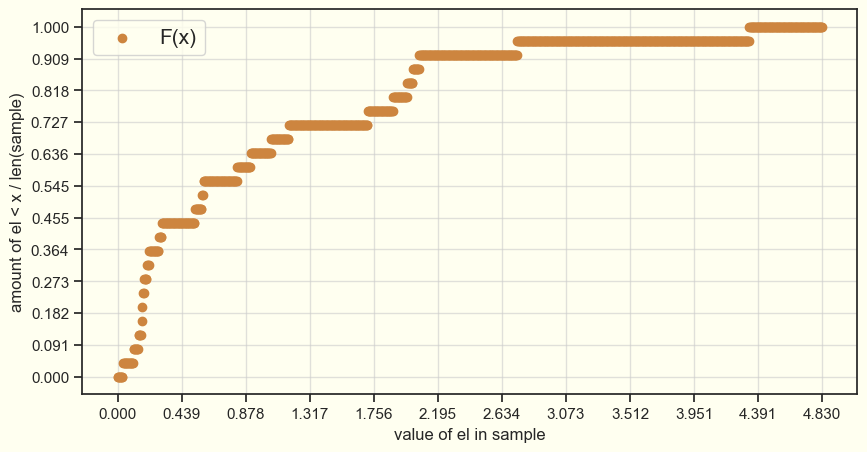

In [33]:
x = np.linspace(0, np.max(sample) + 0.5, 1000)
y = np.array([np.sum(sample<i) for i in x]) / len(sample)

fig, ax = plt.subplots(figsize=(10,5))
ax.grid()

ax.set_xticks(np.linspace(0, np.max(x), 12))
ax.set_yticks(np.linspace(0, np.max(y), 12))

ax.set_xlabel('value of el in sample')
ax.set_ylabel('amount of el < x / len(sample)')

ax.grid(which="major", alpha=0.6)

ax.scatter(x, y, color = 'peru', label ='F(x)')
ax.legend(loc='best', prop={'size': 15})

# histogram

Text(0, 0.5, 'density')

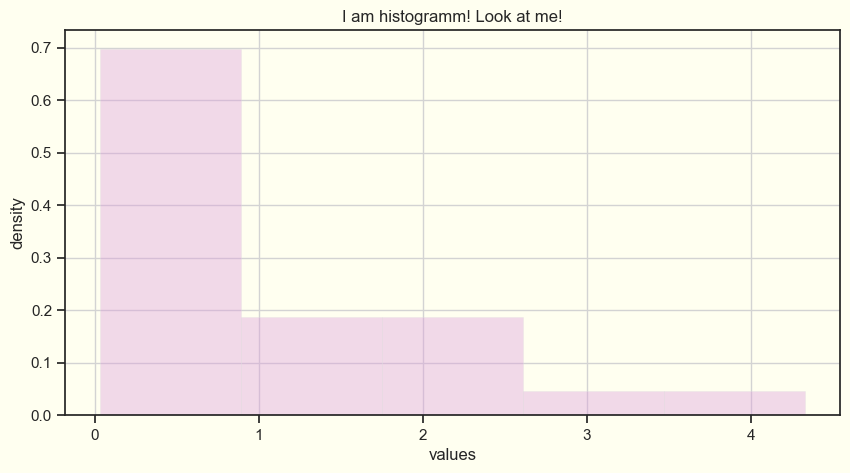

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(sample, bins=5, density = True, color='plum', edgecolor='#e0e0e0',linewidth=0.5, alpha=0.4)
    
ax.grid(color = 'lightgray')
ax.set_title('I am histogramm! Look at me!')    

ax.set_xlabel('values')
ax.set_ylabel('density')

# boxplot

Text(0.5, 0, 'values')

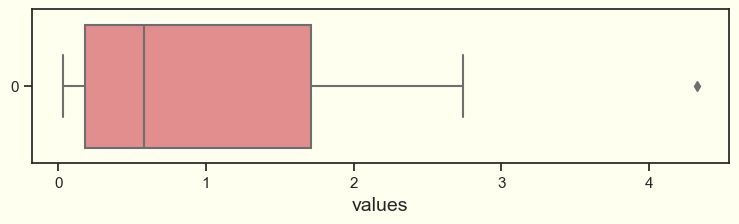

In [35]:
sns.set(
        style="ticks",                   # The 'ticks' style
        rc={"figure.figsize": (9, 2),      # width = 6, height = 9
            "figure.facecolor": "ivory",  # Figure colour
            "axes.facecolor": "ivory"}) 
bp = sns.boxplot(sample, color = "lightcoral", orient = 'h')
bp.set_xlabel("values", fontsize = 14)

# kernel probability density estimate

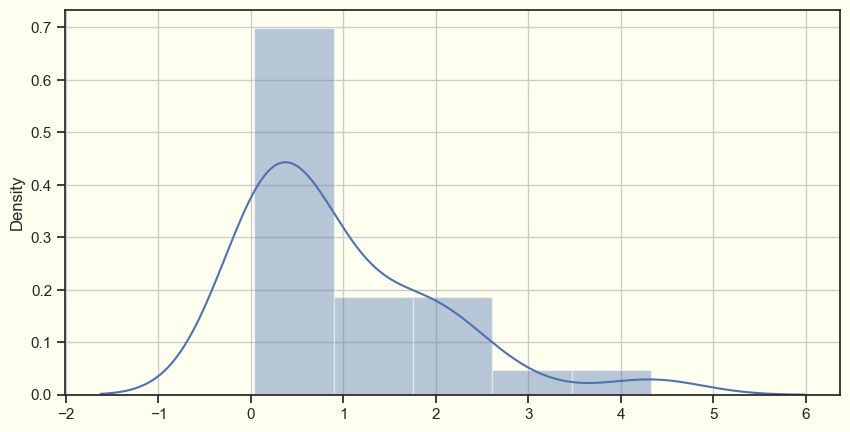

In [36]:
fig, ax = plt.subplots(figsize=(10,5))

pde = sns.distplot(sample)
ax.grid()

# probability density of mean arythm of val

Text(0, 0.5, 'mean density')

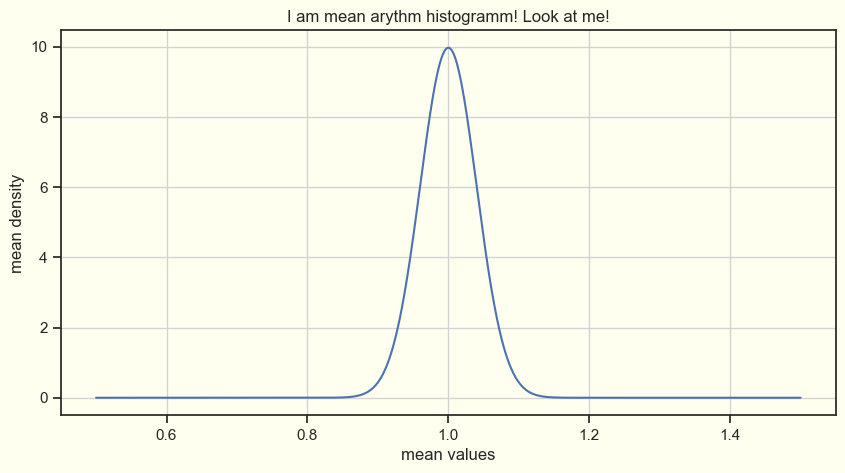

In [45]:
data = np.arange(0.5, 1.5, 0.0001)
pdf = norm.pdf(data , loc = 1 , scale = 1/25)
 
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data, pdf)
ax.grid(color = 'lightgray')
ax.set_title('I am mean arythm plot! Look at me!')    

ax.set_xlabel('mean values')
ax.set_ylabel('mean density')


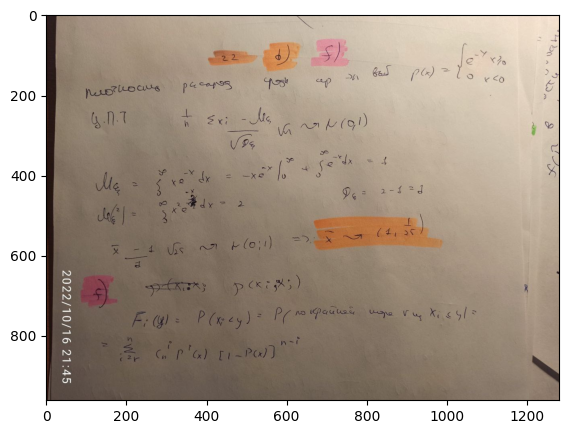

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(skimage.io.imread('img/2d.jpeg'))

# bootstrap of mean arythm (first moment)

In [38]:
N = 1000
m = 20
size = len(sample)

sample_bs = sample.copy()
sample_bs = np.repeat(sample_bs, m)

mean_est = []
for i in range(N):
    random.shuffle(sample_bs)
    mean_est.append(np.mean(sample_bs[:size]))

Text(0, 0.5, 'mean density')

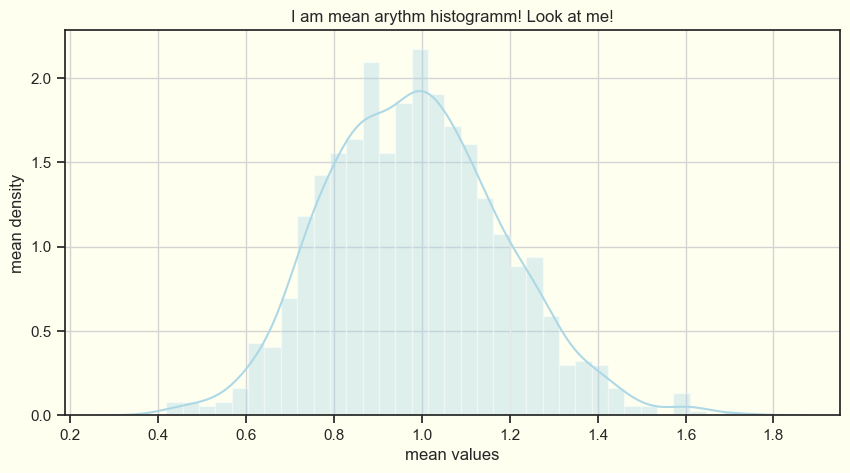

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(a=mean_est, bins = 35, color='lightblue',
             hist_kws={"edgecolor": 'white'})
     
ax.grid(color = 'lightgray')
ax.set_title('I am mean arythm histogramm! Look at me!')    

ax.set_xlabel('mean values')
ax.set_ylabel('mean density')

# bootstrap of assymetric coeff

In [40]:
N = 1000
m = 20
size = len(sample)

sample_bs = sample.copy()
sample_bs = np.repeat(sample_bs, m)

gamma_est = []
for i in range(N):
    random.shuffle(sample_bs)
    gamma_est.append(skew(sample_bs[:size]))

Text(0, 0.5, 'gamma density')

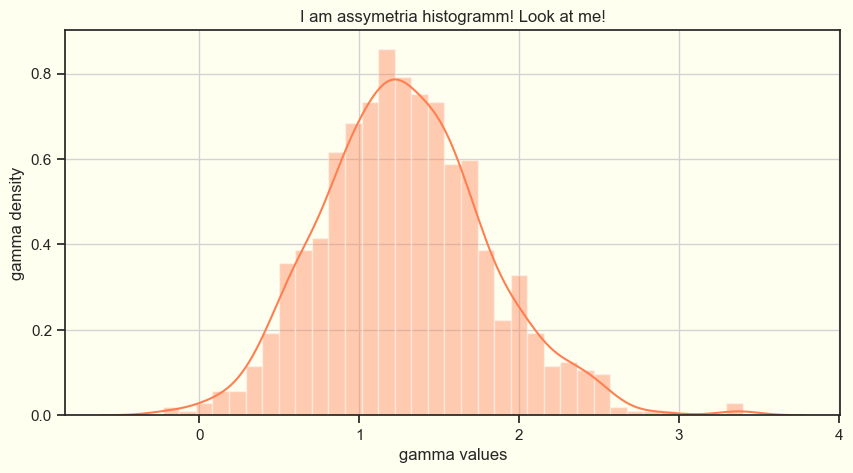

In [41]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(a=gamma_est, bins = 35, color='coral',
             hist_kws={"edgecolor": 'white'})
     
ax.grid(color = 'lightgray')
ax.set_title('I am assymetria histogramm! Look at me!')    

ax.set_xlabel('gamma values')
ax.set_ylabel('gamma density')

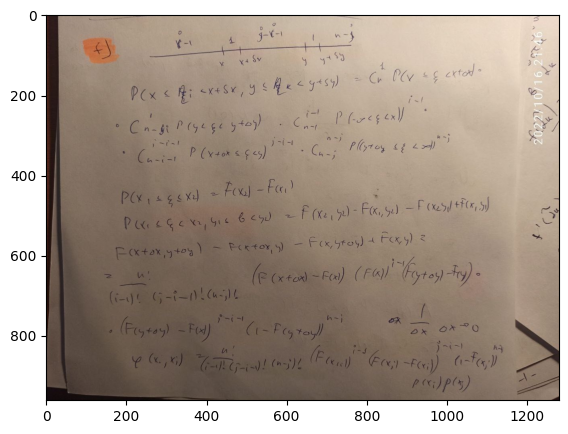

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(skimage.io.imread('img/2f.jpeg'))